# **Diabetes Classification using Machine Learning**

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## **Objective**

We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

**Details about the dataset:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- *Pregnancies:* Number of times pregnant
- *Glucose:* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- *BloodPressure:* Diastolic blood pressure (mm Hg)
- *SkinThickness:* Triceps skin fold thickness (mm)
- *Insulin:* 2-Hour serum insulin (mu U/ml)
- *BMI:* Body mass index (weight in kg/(height in m)^2)
- *DiabetesPedigreeFunction:* Diabetes pedigree function
- *Age:* Age (years)
- *Outcome:* Class variable (0 or 1)

**Number of Observation Units:** 768

**Variable Number:** 9

## **I) Data Analysis**

In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [3]:
import warnings
warnings.simplefilter(action = "ignore")

In [4]:
#Reading data set and the first 5 observation
data=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Data set consists of 768 observation units and 9 variables.
data.shape

(768, 9)

In [6]:
#Descriptive statistics of the data set accessed.
data.describe([0.10,0.25,0.50,0.75,0.90,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00


In [7]:
#The distribution of the Outcome variable
data["Outcome"].value_counts()*100/len(data)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

0    500
1    268
Name: Outcome, dtype: int64

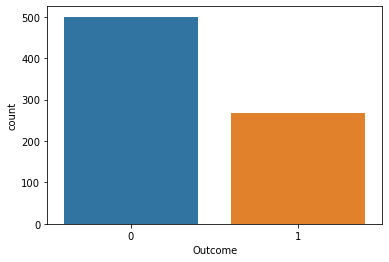

In [8]:
#The classes of the Outcome variable
sns.countplot(x = 'Outcome', data = data);
data.Outcome.value_counts()

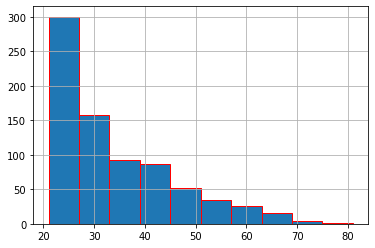

In [9]:
#The histogram of the Age variable
data["Age"].hist(edgecolor = "red");

In [10]:
#Pregnancy and age averages by Outcome classes
print(data.groupby("Outcome").agg({"Pregnancies":"mean"}))
print(data.groupby("Outcome").agg({"Age":"mean"}))
print(data.groupby("Outcome").agg({"Insulin": "mean"}))
print(data.groupby("Outcome").agg({"Glucose": "mean"}))
print(data.groupby("Outcome").agg({"BMI": "mean"}))

         Pregnancies
Outcome             
0           3.298000
1           4.865672
               Age
Outcome           
0        31.190000
1        37.067164
            Insulin
Outcome            
0         68.792000
1        100.335821
            Glucose
Outcome            
0        109.980000
1        141.257463
               BMI
Outcome           
0        30.304200
1        35.142537


In [11]:
print("Maximum Age: " + str(data["Age"].max()))
print("Minimum Age: " + str(data["Age"].min()))

Maximum Age: 81
Minimum Age: 21


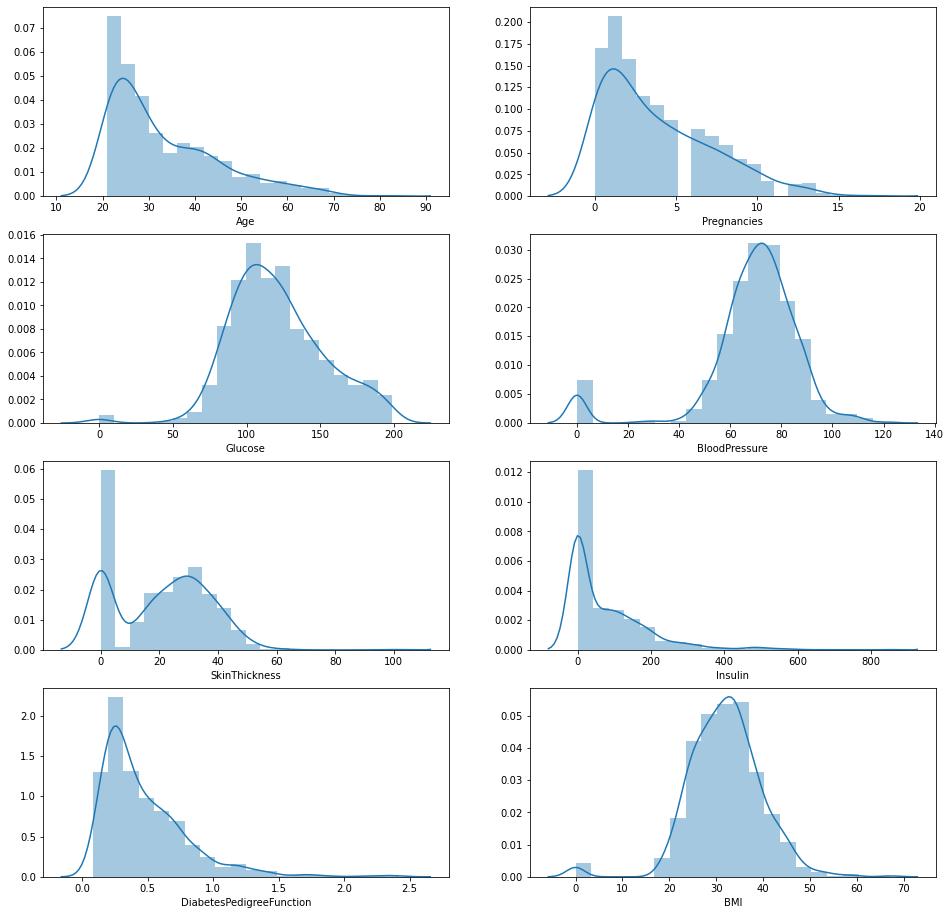

In [12]:
#Histogram and density graphs of all variables
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(data.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(data.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(data.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(data.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(data.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(data.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(data.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(data.BMI, bins = 20, ax=ax[3,1])

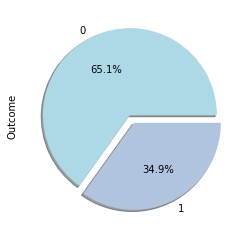

In [13]:
my_colors = ['lightblue','lightsteelblue','silver']
ax = data["Outcome"]
ax.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=my_colors)
plt.show()

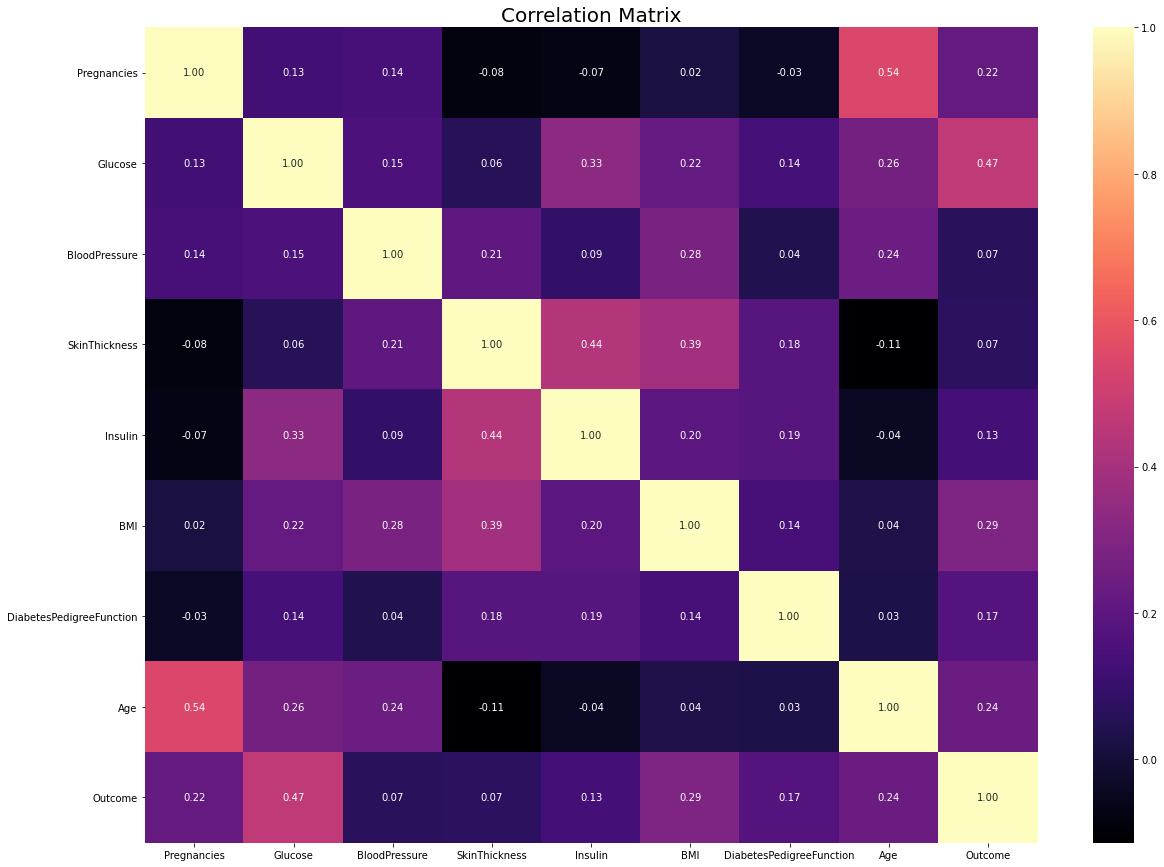

In [14]:
#Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
#If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
#Correlation = 0 means no correlation.
#If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
#When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
#These variables are Glucose. As these increase, Outcome variable increases.
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

## **II) Data Preprocessing**

### **II.I) Missing Observation Analysis**

In [15]:
#We fill cells with a value of 0 as NAN
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [16]:
#Now, we can look at where are missing values
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

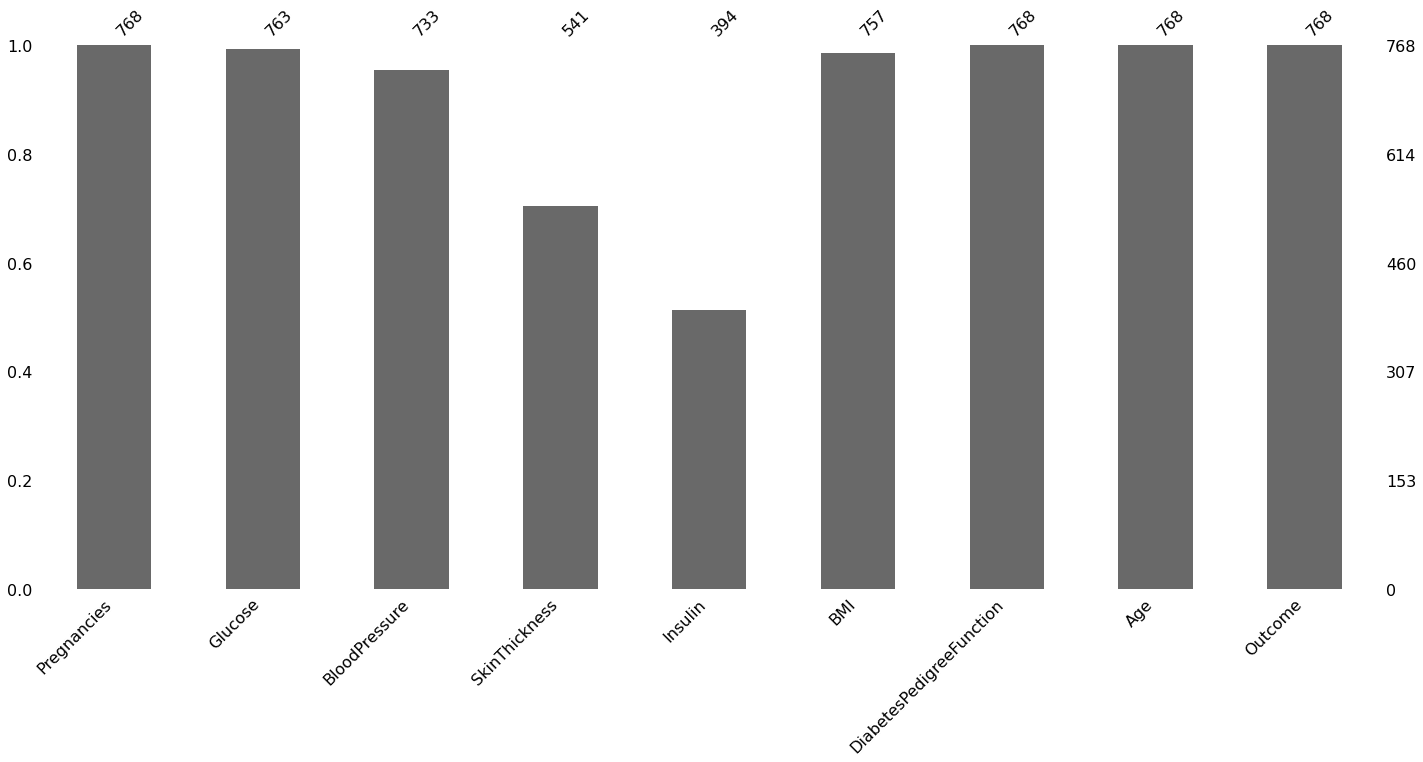

In [17]:
#Have been visualized using the missingno library for the visualization of missing observations
import missingno as msno
msno.bar(data);

In [18]:
#The missing values will be filled with the median values of each variable
def median_target(variable):   
    temp = data[data[variable].notnull()]
    temp = temp[[variable, 'Outcome']].groupby(['Outcome'])[[variable]].median().reset_index()
    return temp

In [19]:
#The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick
columns = data.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    data.loc[(data['Outcome'] == 0 ) & (data[i].isnull()), i] = median_target(i)[i][0]
    data.loc[(data['Outcome'] == 1 ) & (data[i].isnull()), i] = median_target(i)[i][1]

In [20]:
#Missing values were filled
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### **II.II) Outlier Observation Analysis**

In [21]:
#In the data set, there were asked whether there were any outlier observations compared to the 15% and 85% quarters.

for feature in data:
    Q1 = data[feature].quantile(0.15)
    Q3 = data[feature].quantile(0.85)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if data[(data[feature] > upper) | (data[feature] < lower)].any(axis=None):
        print(feature,"→ YES")
        print(data[(data[feature] > upper) | (data[feature] < lower)].shape[0])
    else:
        print(feature,"→ NO")

Pregnancies → NO
Glucose → NO
BloodPressure → YES
1
SkinThickness → YES
2
Insulin → YES
34
BMI → YES
1
DiabetesPedigreeFunction → YES
9
Age → NO
Outcome → NO


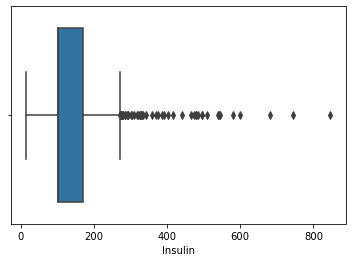

In [22]:
#The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
sns.boxplot(x = data["Insulin"]);

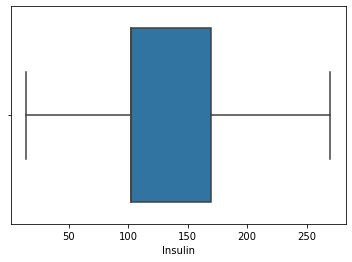

In [23]:
#We suppress contradictory values
Q1 = data.Insulin.quantile(0.20)
Q3 = data.Insulin.quantile(0.80)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data.loc[data["Insulin"] > upper,"Insulin"] = upper

sns.boxplot(x = data["Insulin"]);

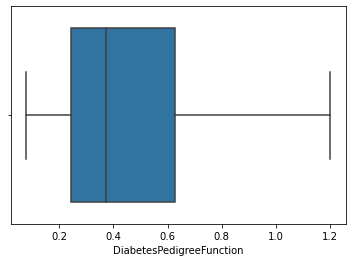

In [24]:
Q1 = data.DiabetesPedigreeFunction.quantile(0.25)
Q3 = data.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data.loc[data["DiabetesPedigreeFunction"] > upper,"DiabetesPedigreeFunction"] = upper

sns.boxplot(x = data["DiabetesPedigreeFunction"]);

### **II.III) Local Outlier Factor(LOF)**

In [25]:
#We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [26]:
data_scores = lof.negative_outlier_factor_
np.sort(data_scores)[0:30]

array([-3.05938778, -2.37298586, -2.15248048, -2.09717923, -2.07737069,
       -1.95259683, -1.86384064, -1.74034913, -1.72709362, -1.71674689,
       -1.70378401, -1.66890742, -1.64311171, -1.64190437, -1.61621407,
       -1.61371241, -1.60058508, -1.59895076, -1.59608858, -1.5705193 ,
       -1.55879516, -1.55665395, -1.51852308, -1.50848647, -1.50285188,
       -1.5016152 , -1.48448965, -1.47530382, -1.47133957, -1.47008846])

In [27]:
#We choose the threshold value according to lof scores
threshold = np.sort(data_scores)[5]
threshold

-1.9525968336061883

In [28]:
#We delete those that are higher than the threshold
outlier = data_scores > threshold
data = data[outlier]
data.shape

(762, 9)

## **III) Feature Engineering**

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [29]:
#According to BMI, some ranges were determined and categorical variables were assigned.
New_BMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
data["New_BMI"] = New_BMI
data.loc[data["BMI"] < 18.5, "New_BMI"] = New_BMI[0]
data.loc[(data["BMI"] > 18.5) & (data["BMI"] <= 24.9), "New_BMI"] = New_BMI[1]
data.loc[(data["BMI"] > 24.9) & (data["BMI"] <= 29.9), "New_BMI"] = New_BMI[2]
data.loc[(data["BMI"] > 29.9) & (data["BMI"] <= 34.9), "New_BMI"] = New_BMI[3]
data.loc[(data["BMI"] > 34.9) & (data["BMI"] <= 39.9), "New_BMI"] = New_BMI[4]
data.loc[data["BMI"] > 39.9 ,"New_BMI"] = New_BMI[5]

In [30]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_BMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,1.200,33,1,Obesity 3


In [31]:
#A categorical variable creation process is performed according to the insulin value.
def set_insulin(row): 
    if row["Insulin"] >= 100 and row["Insulin"] <= 126:
        return "Normal"
    else:
        return "Abnormal"

In [32]:
#The operation performed was added to the dataframe.
data = data.assign(New_Insulin_Score=data.apply(set_insulin, axis=1))
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_BMI,New_Insulin_Score
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Abnormal
4,0,137.0,40.0,35.0,168.0,43.1,1.200,33,1,Obesity 3,Abnormal


In [33]:
#Some intervals were determined according to the glucose variable and these were assigned categorical variables.
New_Glucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
data["New_Glucose"] = New_Glucose
data.loc[data["Glucose"] <= 70, "New_Glucose"] = New_Glucose[0]
data.loc[(data["Glucose"] > 70) & (data["Glucose"] <= 99), "New_Glucose"] = New_Glucose[1]
data.loc[(data["Glucose"] > 99) & (data["Glucose"] <= 126), "New_Glucose"] = New_Glucose[2]
data.loc[data["Glucose"] > 126 ,"New_Glucose"] = New_Glucose[3]
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_BMI,New_Insulin_Score,New_Glucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Abnormal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,1.200,33,1,Obesity 3,Abnormal,Secret


In [34]:
#Let's look at the breaking of newly created variables.
data.groupby(["New_BMI","New_Insulin_Score", "New_Glucose"]).agg({"Outcome": "count"})

Outcome
New_BMI     New_Insulin_Score New_Glucose         
Normal      Abnormal          High               0
                              Low                2
                              Normal            16
                              Overweight        13
                              Secret            12
            Normal            High               0
                              Low                1
                              Normal            20
                              Overweight        29
                              Secret             8
Obesity 1   Abnormal          High               0
                              Low                0
                              Normal            24
                              Overweight        61
                              Secret            77
            Normal            High               0
                              Low                4
                              Normal            23
                              Overweight        28
                              Secret            17
Obesity 2   Abnormal          High               0
                              Low                1
                              Normal            19
                              Overweight        31
                              Secret            49
            Normal            High               0
                              Low                0
                              Normal            16
                              Overweight        24
                              Secret            10
Obesity 3   Abnormal          High               0
                              Low                0
                              Normal             6
                              Overweight        20
                              Secret            48
            Normal            High               0
                              Low                1
                              Normal             4
                              Overweight         6
                              Secret            11
Overweight  Abnormal          High               0
                              Low                1
                              Normal            25
                              Overweight        33
                              Secret            31
            Normal            High               0
                              Low                1
                              Normal            22
                              Overweight        40
                              Secret            24
Underweight Abnormal          High               0
                              Low                0
                              Normal             1
                              Overweight         0
                              Secret             0
            Normal            High               0
                              Low                0
                              Normal             2
                              Overweight         1
                              Secret             0

In [35]:
#The new "New_diabetes" variable defines whether the probability of having diabetes is high or normal or low.
data.loc[data["New_BMI"] == "Underweight", "New_Diabet"] = "Dusuk"
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_BMI,New_Insulin_Score,New_Glucose,New_Diabet
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret,NaN
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal,NaN
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret,NaN
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Abnormal,Normal,NaN
4,0,137.0,40.0,35.0,168.0,43.1,1.200,33,1,Obesity 3,Abnormal,Secret,NaN


In [36]:
data[data["New_BMI"] == "Underweight"]
data.loc[data["New_Glucose"] == "Low", "New_Diabet"] = "Dusuk"
data[data["New_Glucose"] == "Low"]
data.loc[data["New_Glucose"] == "High", "New_Diabet"] = "Yuksek"
data[data["New_Glucose"] == "High"]
data.loc[data["New_Glucose"] == "Secret", "New_Diabet"] = "Yuksek"
data[data["New_Glucose"] == "Secret"]
data.loc[(data["New_BMI"] == "Obesity 3") & (data["New_Insulin_Score"] == "Normal") & (data["New_Glucose"] == "Secret"), "New_Diabet"] = "Dusuk"
data[(data["New_BMI"] == "Obesity 3") & (data["New_Insulin_Score"] == "Normal") & (data["New_Glucose"] == "Secret")]
data["New_Diabet"].fillna("Normal", inplace = True)
data["New_Diabet"].isnull().sum()

0

In [37]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_BMI,New_Insulin_Score,New_Glucose,New_Diabet
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret,Yuksek
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret,Yuksek
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Abnormal,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,1.200,33,1,Obesity 3,Abnormal,Secret,Yuksek


## **IV)One Hot Encoding**

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [38]:
#Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
data = pd.get_dummies(data, columns =["New_BMI","New_Insulin_Score", "New_Glucose", "New_Diabet"], drop_first = True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_BMI_Obesity 1,...,New_BMI_Obesity 3,New_BMI_Overweight,New_BMI_Underweight,New_Insulin_Score_Normal,New_Glucose_Low,New_Glucose_Normal,New_Glucose_Overweight,New_Glucose_Secret,New_Diabet_Normal,New_Diabet_Yuksek
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,...,0,0,0,0,0,0,0,1,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,...,0,1,0,1,0,1,0,0,1,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,137.0,40.0,35.0,168.0,43.1,1.200,33,1,0,...,1,0,0,0,0,0,0,1,0,1


In [39]:
categorical_data = data[['New_BMI_Obesity 1','New_BMI_Obesity 2', 'New_BMI_Obesity 3', 'New_BMI_Overweight','New_BMI_Underweight',
                     'New_Insulin_Score_Normal','New_Glucose_Low','New_Glucose_Normal', 'New_Glucose_Overweight', 'New_Glucose_Secret','New_Diabet_Normal','New_Diabet_Yuksek']]
categorical_data.head()

,New_BMI_Obesity 1,New_BMI_Obesity 2,New_BMI_Obesity 3,New_BMI_Overweight,New_BMI_Underweight,New_Insulin_Score_Normal,New_Glucose_Low,New_Glucose_Normal,New_Glucose_Overweight,New_Glucose_Secret,New_Diabet_Normal,New_Diabet_Yuksek
0,1,0,0,0,0,0,0,0,0,1,0,1
1,0,0,0,1,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,1


In [40]:
y = data["Outcome"]
X = data.drop(["Outcome",'New_BMI_Obesity 1','New_BMI_Obesity 2', 'New_BMI_Obesity 3', 'New_BMI_Overweight','New_BMI_Underweight',
                     'New_Insulin_Score_Normal','New_Glucose_Low','New_Glucose_Normal', 'New_Glucose_Overweight', 'New_Glucose_Secret','New_Diabet_Normal','New_Diabet_Yuksek'], axis = 1)
cols = X.columns
index = X.index

In [41]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,1.200,33


In [42]:
#The variables in the data set are an effective factor in increasing the performance of the models by standardization.  
#There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(X)
X = normalizer.transform(X) 
X = pd.DataFrame(X, columns = cols, index = index)

In [43]:
X = pd.concat([X,categorical_data], axis = 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_BMI_Obesity 1,New_BMI_Obesity 2,New_BMI_Obesity 3,New_BMI_Overweight,New_BMI_Underweight,New_Insulin_Score_Normal,New_Glucose_Low,New_Glucose_Normal,New_Glucose_Overweight,New_Glucose_Secret,New_Diabet_Normal,New_Diabet_Yuksek
0,0.024352,0.600671,0.292218,0.142051,0.687931,0.136369,0.002545,0.202929,1,0,0,0,0,0,0,0,0,1,0,1
1,0.006376,0.541963,0.420818,0.184905,0.653544,0.169603,0.002238,0.197657,0,0,0,1,0,1,0,1,0,0,1,0
2,0.030462,0.696818,0.243696,0.121848,0.645413,0.088720,0.002559,0.121848,0,0,0,0,0,0,0,0,0,1,0,1
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0,0,0,1,0,0,0,1,0,0,1,0
4,0.000000,0.596408,0.174134,0.152367,0.731361,0.187629,0.005224,0.143660,0,0,1,0,0,0,0,0,0,1,0,1


In [44]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## **V)Base Models**

In [45]:
#Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 123456)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 123456)))
models.append(('RF', RandomForestClassifier(random_state = 123456)))
models.append(('SVM', SVC(gamma='auto', random_state = 123456)))
models.append(('XGB', GradientBoostingClassifier(random_state = 123456)))
models.append(("LightGBM", LGBMClassifier(random_state = 123456)))

#Evaluate each model in turn
results = []
names = []

LR: 0.822830 (0.033940)
KNN: 0.851658 (0.031851)
CART: 0.800598 (0.029883)
RF: 0.872676 (0.025121)
SVM: 0.798001 (0.037998)
XGB: 0.853008 (0.011543)
LightGBM: 0.856938 (0.026030)


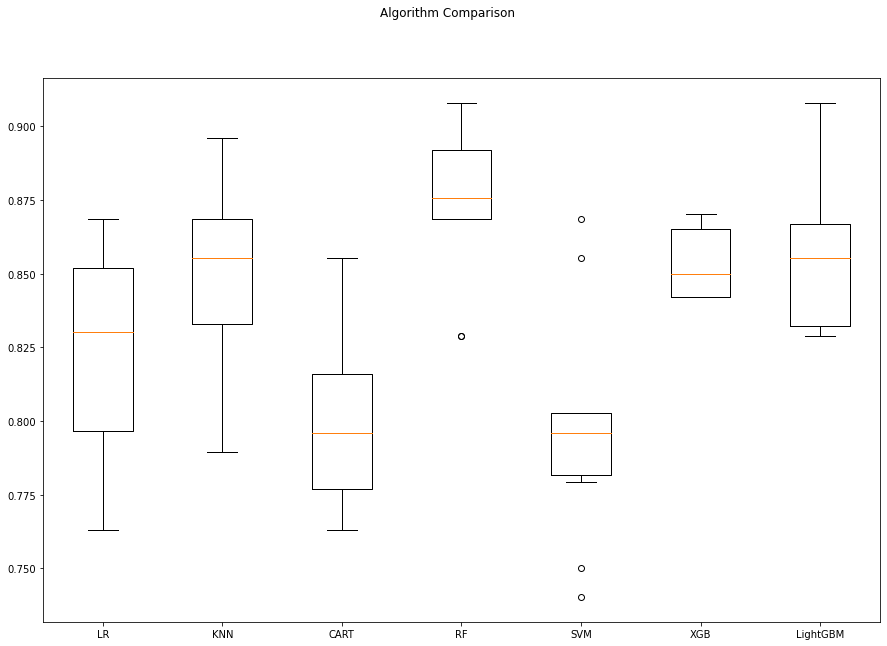

In [46]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 1234)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## **VI)Model Tuning**

### **Random Forests Tuning**

In [47]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [48]:
rf_model = RandomForestClassifier(random_state = 123456)

In [50]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 15,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 15 folds for each of 192 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 22.6min finished


In [51]:
gs_cv.best_params_

{'max_depth': 8,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

### **Final Model Installation**

In [52]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)
rf_tuned = rf_tuned.fit(X,y)
cross_val_score(rf_tuned, X, y, cv = 15).mean()

0.8739607843137255

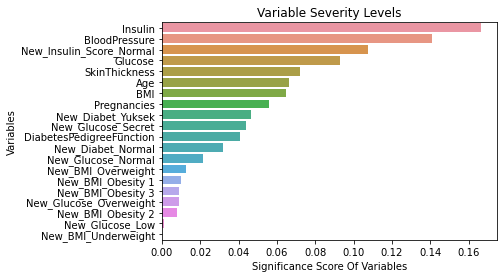

In [53]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### **LightGBM Tuning**

In [54]:
lgbm = LGBMClassifier(random_state = 123456)

In [55]:
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}

In [56]:
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 15, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 15 folds for each of 45 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:  2.4min finished


In [57]:
gs_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1500}

### **Final Model Installation**

In [58]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)
cross_val_score(lgbm_tuned, X, y, cv = 15).mean()

0.871450980392157

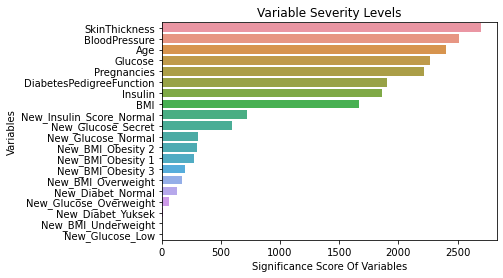

In [59]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### **XGBoost Tuning**

In [60]:
xgb = GradientBoostingClassifier(random_state = 123456)

In [61]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [62]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 15, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 15 folds for each of 720 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 52.2min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 61.0min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 73.1min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

In [63]:
xgb_cv_model.best_params_

{'learning_rate': 1,
 'max_depth': 5,
 'min_samples_split': 0.2777777777777778,
 'n_estimators': 1000,
 'subsample': 0.9}

### **Final Model Installation**

In [64]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)
cross_val_score(xgb_tuned, X, y, cv = 15).mean()

0.8714509803921568

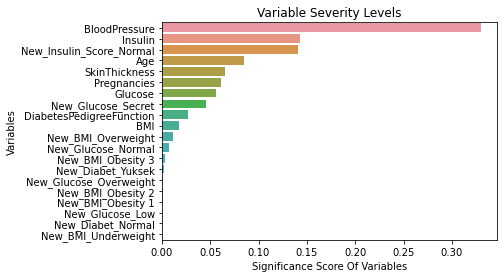

In [65]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

## **VII)Comparison of Final Models**

In [66]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 123456, max_depth = 8, max_features = 3, min_samples_split = 2, n_estimators = 500)))
models.append(("LightGBM", LGBMClassifier(random_state = 123456, learning_rate = 0.01,  max_depth = 5, n_estimators = 1500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 123456, learning_rate = 1, max_depth = 5, min_samples_split = 0.2777777777777778, n_estimators = 1000, subsample = 0.9)))

#Evaluate each model in turn
results = []
names = []

RF: 0.883111 (0.024780)
LightGBM: 0.871451 (0.046224)
XGB: 0.878013 (0.041742)


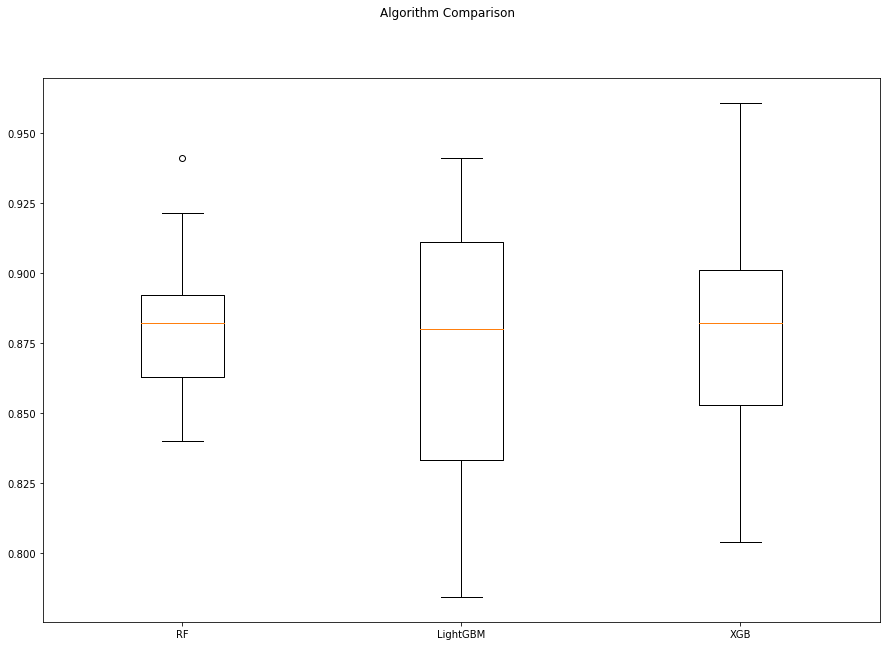

In [67]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 123456)
        cv_results = cross_val_score(model, X, y, cv = 15, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## **VIII)Reporting**

The aim of this study was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum validation scores in the established models. The work done is as follows:

1) Diabetes Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.

3) Data Preprocessing section; df for: The NaN values missing observations were filled with the median values of whether each variable was sick or not. The outliers were determined by LOF and dropped. The X variables were standardized with the rubost method..

4) During Model Building; Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM like using machine learning models Cross Validation Score were calculated. Later Random Forests, XGBoost, LightGBM hyperparameter optimizations optimized to increase Cross Validation value.

5) Result; The model created as a result of Random Forest hyperparameter optimization became the model with the lowest Cross Validation Score value. (0.88)